# The CBS algorithm for MAPF

In [1]:
import networkx as nx
import numpy as np
from matplotlib import pyplot as plt

import sys
sys.path.append('../')
from metrics import flowtime, makespan
                
from MAPF import MultiAgentAStar,find_conflict,CBS
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
from queue import PriorityQueue
from SAPF import SpaceTimeAStar

# from copy import deepcopy

# def CBS(G, start_nodes,goal_nodes, edge_weights = None, max_iter = 2000, metric = flowtime):
    
#     if edge_weights is None:
#             edge_weights = {e:1 for e in G.edges} # Assume uniform weights if None is given.

#     nx.set_edge_attributes(G,edge_weights,'weight')

#     # Initialization: 
#     # Plan inidivual paths for agent agent without considering conflicts.
#     # We simply call the standard networkx library.
#     p = nx.shortest_path(G,weight = 'weight') # The [weight] argument here should be the key to weight values in the edge data dictionary.
#     plan0 = [p[s][g] for s, g in zip(start_nodes, goal_nodes)]

#     CT = ConstraintTree()
#     ROOT = CT.add_CT_node(None,plan0,metric(G,plan0,goal_nodes),[]) # Adding the root node. 

#     OPEN = PriorityQueue()
#     OPEN.put((CT.get_cost(ROOT),ROOT)) 

#     count = 0
#     while not OPEN.empty() and count<=max_iter:
        
#         count+=1 
#         # CBS does not have a way to determine infeasibility. 
#         # To avoid infinite loops, we stop it when it exceeded an iteration threshold..
       
#         cost, node_ID = OPEN.get()
#         solution = CT.get_solution(node_ID)

#         # Look for the first conflict.
#         conflict = find_conflict(solution)
#         if not conflict:
#             return solution, cost
#         else:
            
#             a1, a2, c, t = conflict # c could either be a node or an edge.
            
#             # Get existing constraints
#             constraints = CT.get_constraints(node_ID)
            
#             for a in (a1,a2): # Create two children of the current CT node.
#                 a_constraints = [(a,c,t)]+constraints
                
#                 # Construct the constraint set for the agent.
#                 node_constraints = {s:set() for s in G}
#                 edge_constraints = {e:set() for e in G.edges}
#                 for (agent, cp, tp) in a_constraints:
#                     if agent == a:
#                         if type(cp) is int:
#                             node_constraints[cp].add(tp)
#                         elif type(cp) is tuple:
#                             if cp in edge_constraints.keys(): # The order of the un-directed edge could be flipped.
#                                 edge_constraints[cp].add(tp)
#                             elif cp[::-1] in edge_constraints.keys(): # cp[::-1] is the reversion of cp.
#                                 edge_constraints[cp[::-1]].add(tp)
               
#                 # Call Space-time A* algorithm to replan the agent's path.
#                 result = SpaceTimeAStar(G, start_nodes[a],goal_nodes[a]\
#                                         ,node_constraints,edge_constraints)
                
#                 if result: # If there is a feasible single-agent path. 
#                     path, gscore = result
#                     new_solution = deepcopy(solution)
#                     new_solution[a] = path
                    
#                     # Create a new child in the Constraint Tree.
#                     new_node_ID = CT.add_CT_node(node_ID, new_solution,\
#                                                  metric(G,new_solution,goal_nodes),[(a,c,t)])
                    
#                     # Push the new child onto the OPEN queue.
#                     OPEN.put((CT.get_cost(new_node_ID),new_node_ID))
                
    
#     return None
        

# class ConstraintTree(nx.Graph):
#     def __init__(self):
#         super().__init__()
        
#     def get_solution(self,ID):
#         return self.nodes[ID]['solution']
    
#     def get_cost(self,ID):
#         return self.nodes[ID]['cost']
    
#     def get_constraints(self,ID):
#         '''
#             Get the constraints stored at the current CT node and its ancestors.
#         '''
#         return [c for a in nx.ancestors(self,ID).union([ID]) for c in self.__get_constraints_at__(a)]
   
#     def __get_constraints_at__(self,ID):
        
#         '''
#             Get the constraints stored at the current CT node only.
#         '''
#         return self.nodes[ID]['constraints']
    
    
#     def add_CT_node(self,parent_node,solution, cost, constraints):
#         '''
#             constraints: either [] or a list with a single element.
#         '''
#         new_node_ID = self.number_of_nodes()
#         self.add_node(new_node_ID, solution=solution,cost=cost,constraints=constraints)
        
#         if parent_node:
#             self.add_edge(parent_node,new_node_ID)
        
#         return new_node_ID

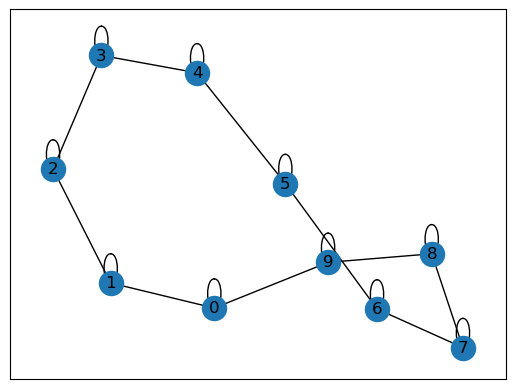

In [3]:
G = nx.circulant_graph(10,offsets = [0,1])
nx.draw_networkx(G)

In [4]:
# Basic components of the MAPF problem

G # The graph

start_nodes = tuple([0,1]) # Must be hashable.

goal_nodes = tuple([3,9]) 

'''
    If the problem is labeled, the goals are pre-assigned to the agents, meaning agent k must go to goal k. 
    Otherwise, the goals are not pre-assigned to the agents, meaning the problem is considered solved if all goals are occupied by the agents.
'''
labeled_goals = True 

print('Multi-agent A*', MultiAgentAStar(G,start_nodes,goal_nodes,labeled_goals))

print('CBS',CBS(G,start_nodes,goal_nodes))

Multi-agent A* (array([[0, 9, 8, 7, 6, 5, 4, 3],
       [1, 0, 9, 9, 9, 9, 9, 9]]), 9)
CBS ([[0, 9, 8, 7, 6, 5, 4, 3], [1, 0, 9]], 9)


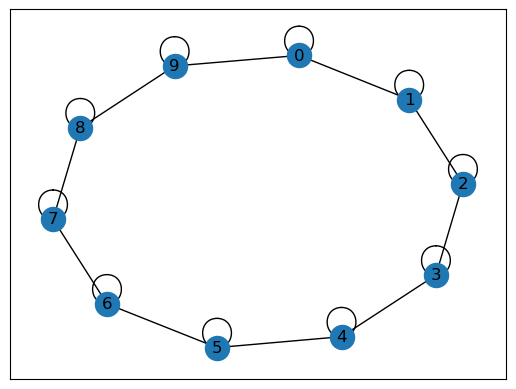

In [5]:
G = nx.circulant_graph(10,offsets = [0,1])
nx.draw_networkx(G)

In [6]:
# Basic components of the MAPF problem

G # The graph

start_nodes = tuple([0,1,2]) # Must be hashable.

goal_nodes = tuple([3,6,9]) 

'''
    If the problem is labeled, the goals are pre-assigned to the agents, meaning agent k must go to goal k. 
    Otherwise, the goals are not pre-assigned to the agents, meaning the problem is considered solved if all goals are occupied by the agents.
'''
labeled_goals = True 


print('Multi-agent A*', MultiAgentAStar(G,start_nodes,goal_nodes,labeled_goals))

print('CBS',CBS(G,start_nodes,goal_nodes))

Multi-agent A* (array([[0, 1, 2, 3, 3, 3, 3, 3],
       [1, 2, 3, 4, 5, 6, 6, 6],
       [2, 3, 4, 5, 6, 7, 8, 9]]), 15)
CBS ([[0, 9, 8, 7, 6, 5, 4, 3], [1, 0, 9, 8, 7, 6], [2, 1, 0, 9]], 15)


In [7]:
from time import time

n_nodes = 20

ldim = int(np.ceil(np.sqrt(n_nodes)))
udim = int(np.floor(np.sqrt(n_nodes)))
G = nx.grid_graph([ldim,udim])
G = nx.convert_node_labels_to_integers(G)

for i in range(len(G)):
    G.add_edge(i,i)
    
n_nodes = G.number_of_nodes()

n_agents = 3

for _ in range(200):

    start_nodes = tuple(np.random.choice(range(n_nodes),n_agents,replace=False)) # Must be hashable.

    goal_nodes = tuple(np.random.choice(range(n_nodes),n_agents,replace=False)) 

    labeled_goals = True 

    t = time()
    result = MultiAgentAStar(G,start_nodes,goal_nodes,labeled_goals)
    if result:
        _,MAAS_ft = result
    else:
        continue
    MAAS_time = time()-t

    # print('Multi-agent A*', result, 'time', MAAS_time)

    t = time()
    result = CBS(G,start_nodes,goal_nodes)
    if result:
        _,CBS_ft = result
    else:
        continue
    CBS_time = time()-t
    
    if _:
        print('CBS Flowtime == MAAS Flowtime?',CBS_ft == MAAS_ft)


CBS Flowtime == MAAS Flowtime? True
CBS Flowtime == MAAS Flowtime? True
CBS Flowtime == MAAS Flowtime? True
CBS Flowtime == MAAS Flowtime? True
CBS Flowtime == MAAS Flowtime? True
CBS Flowtime == MAAS Flowtime? True
CBS Flowtime == MAAS Flowtime? True
CBS Flowtime == MAAS Flowtime? True
CBS Flowtime == MAAS Flowtime? True
CBS Flowtime == MAAS Flowtime? True
CBS Flowtime == MAAS Flowtime? True
CBS Flowtime == MAAS Flowtime? True
CBS Flowtime == MAAS Flowtime? True
CBS Flowtime == MAAS Flowtime? True
CBS Flowtime == MAAS Flowtime? True
CBS Flowtime == MAAS Flowtime? True
CBS Flowtime == MAAS Flowtime? True
CBS Flowtime == MAAS Flowtime? True
CBS Flowtime == MAAS Flowtime? True
CBS Flowtime == MAAS Flowtime? True
CBS Flowtime == MAAS Flowtime? True
CBS Flowtime == MAAS Flowtime? True
CBS Flowtime == MAAS Flowtime? True
CBS Flowtime == MAAS Flowtime? True
CBS Flowtime == MAAS Flowtime? True
CBS Flowtime == MAAS Flowtime? True
CBS Flowtime == MAAS Flowtime? True
CBS Flowtime == MAAS Flowtim